In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
class Model(nn.Module):
    # 4 feature
    # 1 target
    
    def __init__(self,in_features=4,h1=8,h2=8,out_featurs=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_featurs)
        
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

In [3]:
torch.manual_seed(42)

In [4]:
model = Model()

In [5]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.shape

(150, 5)

In [7]:
df['species'] = df['species'].map({'setosa':0.0,'versicolor':1.0,'virginica':2.0})

In [8]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [9]:
x = df.drop('species',axis=1).values

In [10]:
y = df['species'].values

In [11]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [12]:
x_train.shape, y_train.shape

((105, 4), (105,))

In [13]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

In [14]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [15]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)>

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [17]:
epochs = 1000
losses = []

for i in range(1,epochs+1):
    y_pred = model.forward(x_train)
    
    loss = criterion(y_pred,y_train)
    
    losses.append(loss.detach().numpy())
    
    if i%100 == 0:
        print(f'Epoch: {i} and loss: {loss}')
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 100 and loss: 0.9825183749198914
Epoch: 200 and loss: 0.6379014253616333
Epoch: 300 and loss: 0.32398176193237305
Epoch: 400 and loss: 0.17733654379844666
Epoch: 500 and loss: 0.11817421019077301
Epoch: 600 and loss: 0.09406150877475739
Epoch: 700 and loss: 0.08244315534830093
Epoch: 800 and loss: 0.07588159292936325
Epoch: 900 and loss: 0.07166232913732529
Epoch: 1000 and loss: 0.06868875026702881


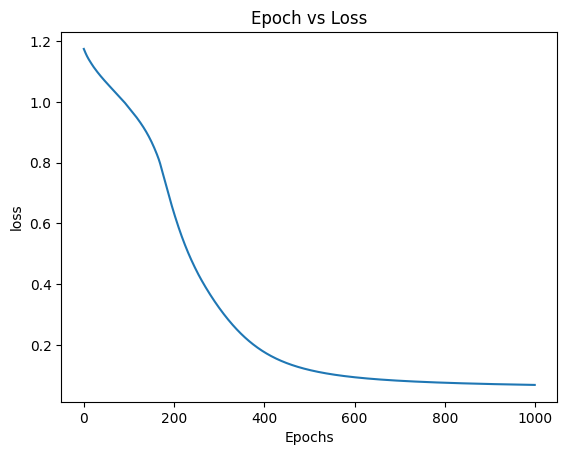

In [18]:
plt.plot(range(epochs),losses)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Epoch vs Loss')
plt.show()

In [19]:
with torch.no_grad():
    y_eval = model.forward(x_test)
    loss = criterion(y_eval,y_test )

loss

tensor(0.0399)

In [20]:
correct = 0

with torch.no_grad():
    for i ,data in enumerate(x_test):
        y_val = model.forward(data)
        print(f'{i+1}). {str(y_val)} \t {y_test[i]}')
        
        if y_val.argmax().item() == y_test[i]:
            correct +=1
        
print(f'\nWe got {correct} correct')

1). tensor([-3.2242,  4.2773,  0.3353]) 	 1
2). tensor([  6.3928,  -0.4923, -11.9749]) 	 0
3). tensor([-10.7229,  -2.1944,  11.7328]) 	 2
4). tensor([-3.3016,  4.0699,  0.5291]) 	 1
5). tensor([-3.4760,  4.6299,  0.3889]) 	 1
6). tensor([  5.9354,  -0.4620, -11.1632]) 	 0
7). tensor([-1.0828,  4.2062, -2.6224]) 	 1
8). tensor([-5.8132,  2.2400,  4.1341]) 	 2
9). tensor([-4.3082,  2.9426,  2.2545]) 	 1
10). tensor([-1.7159,  4.8459, -1.7857]) 	 1
11). tensor([-5.2231,  2.5815,  3.3270]) 	 2
12). tensor([  5.8068,  -0.6275, -10.6289]) 	 0
13). tensor([  6.7480,  -0.9118, -12.1756]) 	 0
14). tensor([  5.8132,  -0.5473, -10.7179]) 	 0
15). tensor([  6.3198,  -0.8341, -11.6422]) 	 0
16). tensor([-3.2048,  4.5919,  0.1011]) 	 1
17). tensor([-7.8677, -0.2464,  7.6684]) 	 2
18). tensor([-1.8714,  4.8408, -1.4191]) 	 1
19). tensor([-3.2033,  3.8964,  0.5351]) 	 1
20). tensor([-7.7343, -0.2876,  7.5707]) 	 2
21). tensor([  5.4452,  -0.4309, -10.2489]) 	 0
22). tensor([-4.8280,  2.5746,  2.9418])

In [21]:
new_data = torch.tensor([4.5,3,4,0.4])

with torch.no_grad():
    model(new_data)